### Boosting

In this notebook we have used Boosting techniques and the best parameters are choosen using Hyper Parameter tuning with GridSearch CV

1. Adaptive Boosting
2. Gradient Boost
3. XGBoost
4. Light GBM
5. CatBoost

In [2]:
!pip install catboost

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import datetime
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_train = pd.read_csv('dataset/df_train.csv')
df_test = pd.read_csv('dataset/df_test.csv')
target = df_train['SalePrice']
df_train = df_train.drop(['SalePrice'], axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size = 0.25, random_state = 42)

#### 1. Adaptive Boosting

In [9]:
#Decision Tree is used as default base estimator
parameters= {
    'n_estimators':[100,200, 300],
    'learning_rate':[0.05, 0.1,0.15,0.20],
    'random_state':[42],
    'loss' : ['linear', 'square', 'exponential']
}

adaBoost = AdaBoostRegressor()
clf = GridSearchCV(adaBoost, parameters, verbose=0, iid=False)
clf.fit(X_train, y_train)
abr = AdaBoostRegressor(**clf.best_params_)

print('\nRegressor: \n', abr, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))


Regressor: 
 AdaBoostRegressor(base_estimator=None, learning_rate=0.2, loss='exponential',
                  n_estimators=300, random_state=42) 

14:16	Done!
####################################################


#### 2. Gradient Boosting Regressor

In [10]:
print('##############################################\n{}\tGradient Boost'.format(datetime.datetime.now().strftime('%H:%M')))

parameters= {
    'n_estimators':[8000],
    'learning_rate':[0.01],
    'max_depth':[2],
    'max_features':['sqrt'],
    'min_samples_leaf':[10],
    'min_samples_split':[5],
    'loss':['huber'],
    'random_state':[42]
}

gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr, parameters, verbose=0, iid = False)
clf.fit(X_train, y_train)
gbr = GradientBoostingRegressor(**clf.best_params_)

print('\nRegressor: \n', gbr, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))

##############################################
14:17	Gradient Boost

Regressor: 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='huber', max_depth=2,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=8000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

14:18	Done!
####################################################


#### 3. XGBOOST

In [12]:
print('####################################################\n{}\tXGBoost'
      .format(datetime.datetime.now().strftime('%H:%M')))
# hyper parameter optimization
learning_rate =[0.05,0.1,0.15,0.20]
max_depth = [2,3,5,10,15]
min_child_weight = [1,2,3,4]
n_estimators = [100,500,900,100,1500]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]

#define the grid of hyperparameters to search
hyperparameter_grid = {
    'colsample_bytree':[0.4],
    'gamma':[0.0],
    'learning_rate': learning_rate,
    'max_depth':max_depth,
    'min_child_weight':min_child_weight,
    'n_estimators':n_estimators,
    'seed':[36],
    'subsample':[0.2],
    'objective':['reg:squarederror'],
    'reg_alpha':[0.00006],
    'cale_pos_weight':[1],
    'booster': booster,
    'base_score': base_score
}
classifier = XGBRegressor()
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv = 5, n_iter=50, n_jobs=4,
            scoring='neg_mean_absolute_error',
            verbose = 5, return_train_score= True,
            random_state=42)

random_cv.fit(X_train, y_train)

####################################################
14:22	XGBoost
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   27.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  8.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                                        'colsample_bytree': [0.4],
                                        'gamma': [0.0],
                                        'learning_rate': [0.05, 0.

In [13]:
XGBoost = XGBRegressor(**random_cv.best_params_)
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))

14:30	Done!
####################################################


#### 4. Light GBM

In [14]:
print('#############################\n{}\tLightGBM'.format(datetime.datetime.now().strftime('%H:%M')))

parameters = {
    'objective':['regression'],
    'num_leaves':[5],
    'learning_rate':[0.05],
    'n_estimators':[720],
    'max_bin':[55],
    'max_depth':[2,3],
    'bagging_fraction':[.5,.8],
    'bagging_freq':[5],
    'bagging_seed':[9],
    'feature_fraction':[0.2319]
}

light = LGBMRegressor()
clf = GridSearchCV(light, parameters, verbose=0, iid=False)
clf.fit(X_train, y_train)

#############################
14:30	LightGBM


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_l...
                                     subsample_freq=0),
             iid=False, n_jobs=None,
             param_grid={'bagging_fraction': [0.5, 0.8], 'bagging_freq': [5],
                         'bagging_seed': [9], 'feature_fraction': [0.2319],
                         'learning_rate': [0.05], 'max_bin': [55],
                         'max_depth': [2, 3

In [15]:
lightgbm = LGBMRegressor(**clf.best_params_)
print('\nRegressor: \n', lightgbm, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))


Regressor: 
 LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, importance_type='split',
              learning_rate=0.05, max_bin=55, max_depth=2, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=720,
              n_jobs=-1, num_leaves=5, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 

14:30	Done!
####################################################


#### 5. CatBoost Regressor

In [19]:
parameters= {
    'n_estimators':[100],
    'learning_rate':[0.1],
    'max_depth':[10],
    'random_state':[42]
}

catBoost = CatBoostRegressor()
clf = GridSearchCV(catBoost, parameters, verbose=0, iid=False)
clf.fit(X_train, y_train)
cbr = CatBoostRegressor(**clf.best_params_)

print('\nRegressor: \n', cbr, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))

0:	learn: 0.3794305	total: 86.2ms	remaining: 8.53s
1:	learn: 0.3582994	total: 234ms	remaining: 11.5s
2:	learn: 0.3373249	total: 336ms	remaining: 10.9s
3:	learn: 0.3218894	total: 454ms	remaining: 10.9s
4:	learn: 0.3063834	total: 568ms	remaining: 10.8s
5:	learn: 0.2904133	total: 698ms	remaining: 10.9s
6:	learn: 0.2757717	total: 767ms	remaining: 10.2s
7:	learn: 0.2627840	total: 896ms	remaining: 10.3s
8:	learn: 0.2514328	total: 1.08s	remaining: 10.9s
9:	learn: 0.2389110	total: 1.21s	remaining: 10.9s
10:	learn: 0.2279793	total: 1.36s	remaining: 11s
11:	learn: 0.2186908	total: 1.49s	remaining: 11s
12:	learn: 0.2085422	total: 1.66s	remaining: 11.1s
13:	learn: 0.1997346	total: 1.79s	remaining: 11s
14:	learn: 0.1920227	total: 1.95s	remaining: 11s
15:	learn: 0.1849274	total: 2.12s	remaining: 11.1s
16:	learn: 0.1778043	total: 2.31s	remaining: 11.3s
17:	learn: 0.1712025	total: 2.45s	remaining: 11.2s
18:	learn: 0.1651576	total: 2.62s	remaining: 11.1s
19:	learn: 0.1595775	total: 2.77s	remaining: 11.

62:	learn: 0.0782765	total: 10.1s	remaining: 5.92s
63:	learn: 0.0777054	total: 10.2s	remaining: 5.74s
64:	learn: 0.0770348	total: 10.3s	remaining: 5.57s
65:	learn: 0.0762038	total: 10.5s	remaining: 5.39s
66:	learn: 0.0752446	total: 10.6s	remaining: 5.22s
67:	learn: 0.0747345	total: 10.8s	remaining: 5.06s
68:	learn: 0.0736711	total: 10.9s	remaining: 4.89s
69:	learn: 0.0730704	total: 11s	remaining: 4.72s
70:	learn: 0.0721965	total: 11.2s	remaining: 4.58s
71:	learn: 0.0714349	total: 11.4s	remaining: 4.42s
72:	learn: 0.0709884	total: 11.5s	remaining: 4.26s
73:	learn: 0.0703156	total: 11.7s	remaining: 4.1s
74:	learn: 0.0692567	total: 11.8s	remaining: 3.93s
75:	learn: 0.0685558	total: 11.9s	remaining: 3.76s
76:	learn: 0.0680060	total: 12.1s	remaining: 3.6s
77:	learn: 0.0673270	total: 12.2s	remaining: 3.44s
78:	learn: 0.0666644	total: 12.3s	remaining: 3.27s
79:	learn: 0.0665096	total: 12.4s	remaining: 3.11s
80:	learn: 0.0659853	total: 12.6s	remaining: 2.95s
81:	learn: 0.0654199	total: 12.7s	r

25:	learn: 0.1353996	total: 3.51s	remaining: 10s
26:	learn: 0.1327804	total: 3.68s	remaining: 9.95s
27:	learn: 0.1296078	total: 3.83s	remaining: 9.86s
28:	learn: 0.1270940	total: 3.97s	remaining: 9.73s
29:	learn: 0.1245425	total: 4.11s	remaining: 9.58s
30:	learn: 0.1221729	total: 4.26s	remaining: 9.48s
31:	learn: 0.1198184	total: 4.39s	remaining: 9.32s
32:	learn: 0.1176685	total: 4.53s	remaining: 9.19s
33:	learn: 0.1157750	total: 4.65s	remaining: 9.04s
34:	learn: 0.1135650	total: 4.78s	remaining: 8.88s
35:	learn: 0.1116008	total: 4.91s	remaining: 8.72s
36:	learn: 0.1099381	total: 5.04s	remaining: 8.59s
37:	learn: 0.1085177	total: 5.2s	remaining: 8.49s
38:	learn: 0.1071855	total: 5.36s	remaining: 8.38s
39:	learn: 0.1056871	total: 5.52s	remaining: 8.27s
40:	learn: 0.1044618	total: 5.66s	remaining: 8.14s
41:	learn: 0.1031711	total: 5.82s	remaining: 8.04s
42:	learn: 0.1016220	total: 5.99s	remaining: 7.94s
43:	learn: 0.1002664	total: 6.18s	remaining: 7.87s
44:	learn: 0.0990321	total: 6.32s	

In [21]:
#fitting the 5 models defined previously
models = {
    'adaBoost':abr,
    'GradientBoost':gbr,
    'XGBoost':XGBoost,
    'lightgbm':lightgbm,
    'catBoost':cbr,
}

df_metric1 = utils.fit_models(X_train, y_train, X_test, y_test,models)

Fitting: 	adaBoost
Done!
Fitting: 	GradientBoost
Done!
Fitting: 	XGBoost
Done!
Fitting: 	lightgbm
Done!
Fitting: 	catBoost
0:	learn: 0.3745925	total: 69.6ms	remaining: 6.89s
1:	learn: 0.3511309	total: 137ms	remaining: 6.71s
2:	learn: 0.3299608	total: 223ms	remaining: 7.2s
3:	learn: 0.3119348	total: 289ms	remaining: 6.93s
4:	learn: 0.2944558	total: 356ms	remaining: 6.76s
5:	learn: 0.2777871	total: 434ms	remaining: 6.8s
6:	learn: 0.2645578	total: 498ms	remaining: 6.62s
7:	learn: 0.2517775	total: 568ms	remaining: 6.53s
8:	learn: 0.2393167	total: 645ms	remaining: 6.52s
9:	learn: 0.2277194	total: 715ms	remaining: 6.43s
10:	learn: 0.2171276	total: 783ms	remaining: 6.33s
11:	learn: 0.2078052	total: 861ms	remaining: 6.31s
12:	learn: 0.1998436	total: 932ms	remaining: 6.23s
13:	learn: 0.1921137	total: 1.03s	remaining: 6.31s
14:	learn: 0.1858360	total: 1.1s	remaining: 6.25s
15:	learn: 0.1793341	total: 1.18s	remaining: 6.2s
16:	learn: 0.1725864	total: 1.27s	remaining: 6.21s
17:	learn: 0.1675744	to

In [22]:
df_metric1 = df_metric1.set_index('model')
df_metric1

,rmse,r2,rmsle
model,,,
adaBoost,0.168077,0.826268,0.013156
GradientBoost,0.116836,0.916050,0.009226
XGBoost,0.122211,0.908148,0.009620
lightgbm,0.120488,0.910720,0.009483
catBoost,0.129251,0.897262,0.010168


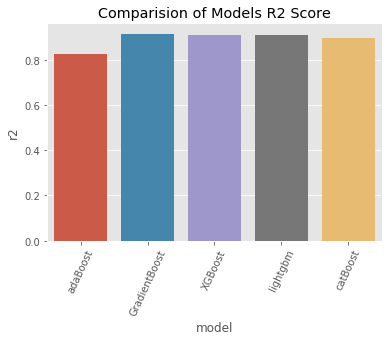

In [23]:
## plt.figure(figsize = (15,8))
ax = sns.barplot(x=df_metric1.index, y="r2", data=df_metric1)
ax.set_title('Comparision of Models R2 Score')
ax.set_xticklabels(ax.get_xticklabels(),rotation=65)
plt.show()

Gradient Boosting seems to perform well in this case. Lets try stacking the models now.